
# **Neuronnal Network**

Un réseau de neurones (neuronnal network) est un ensemble d’algorithmes inspirés par le cerveau humain. Le but de cette technologie est de simuler l’activité du cerveau humain, et plus spécifiquement la reconnaissance de motifs et la transmission d’informations entre les différentes couches de connexions neuronales.



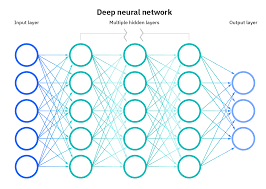

## **Informations sur l'ensemble de données :**
Zoo est une base de données simple contenant 17 attributs à valeur booléenne. L'attribut "type" est l'attribut class. 

** -- Ensemble d'animaux :**
====== == =================================================

1 -- (41) oryctérope, antilope, ours, sanglier, buffle, veau, cavy, guépard, cerf, dauphin, éléphant, roussette, girafe, fille, chèvre, gorille, hamster, lièvre, léopard, lion, lynx, vison, taupe, mangouste, opossum, oryx, ornithorynque, putois, poney, marsouin, puma, minou, raton laveur, renne, joint, lion de mer, écureuil, vampire, campagnol, wallaby, loup

2 -- (20) poulet, corbeau, colombe, canard, flamant rose, goéland, faucon, kiwi, alouette, autruche, perruche, pingouin, faisan, nandou, écumoire, labbe, moineau, cygne, vautour, troglodyte

3 -- (5 ) pitviper, serpent de mer, ver lent, tortue, tuatara

4 -- (13) achigan, carpe, poisson-chat, chevesne, roussette, églefin, hareng, brochet, piranha, hippocampe, sole, raie, thon

5 -- (4) grenouille, grenouille , triton, crapaud

6 -- (8) puce, moucheron, abeille, mouche domestique, coccinelle, papillon de nuit, termite, guêpe

7 -- (10) palourde, crabe, écrevisse, homard, poulpe, scorpion, guêpe, limace, étoile de mer, ver


**Informations sur les attributs :**

1. nom de l'animal : unique pour chaque instance
2. poils : booléen
3. plumes : booléen
4. œufs : booléen
5. lait : booléen
6. aéroporté : booléen
7. aquatique : booléen
8. prédateur : booléen
9. à dents : booléen
10 . backbone : booléen
11. respire : booléen
12. venimeux : booléen
13. nageoires : booléen
14. pattes : numérique (ensemble de valeurs : {0,2,4,5,6,8})
15. queue : booléen
16. domestic :
17 booléen. catsize :
18 booléen. type : numérique (valeurs entières dans la plage [1,7])



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold, cross_val_score

In [2]:
zoo = pd.read_csv('zoo.csv')
zoo.head()
zoo.columns

Index(['aardvark', '1', '0', '0.1', '1.1', '0.2', '0.3', '1.2', '1.3', '1.4',
       '1.5', '0.4', '0.5', '4', '0.6', '0.7', '1.6', '1.7'],
      dtype='object')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
zoo = zoo.rename(columns={
    'aardvark':'animal_name',
    '1':'hair',
    '0':'feathers',
    '0.1':'eggs',
    '1.1':'milk',
    '0.2':'airborne',
    '0.3':'aquatics',
    '1.2':'predator	',
    '1.3':'toothed',
    '1.4':'backbone',
    '1.5':'breathes',
    '0.4':'venomous',
    '0.5':'fins',
    '4':'legs',
    '0.6':'tail',
    '0.7':'domestic',
    '1.6':'catsize',
    '1.7':'type'
})

In [4]:
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatics,predator\t,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7




---



Model

In [5]:
zoo=zoo.drop(['animal_name'],axis=1)


In [6]:
### separer les donenées (Train et test)
Y = zoo['type']
X = zoo.drop(['type'] , axis=1)
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size= 0.3, random_state=12)

In [7]:
### Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

# Neuronal Network

# **MLP: Classificateur Perceptron multicouche**


Le MLP est un modèle de réseau de neurones artificiels à action directe qui mappe des ensembles de données d'entrée à un ensemble de sorties appropriées. Un MLP se compose de plusieurs couches et chaque couche est entièrement connectée à la suivante. Les nœuds des couches sont des neurones à fonctions d'activation non linéaires, à l'exception des nœuds de la couche d'entrée. Entre la couche d'entrée et la couche de sortie, il peut y avoir une ou plusieurs couches cachées non linéaires.

In [24]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(trainX_scaled, Y_train)
#clf.predict_proba(X_test)
pred_nn = nn.predict(X_test)
nn_acc = accuracy_score(Y_test,pred_clf)
#clf.score(X_test, Y_test)
#print('accuracy du neural network est', clf_acc)

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [26]:
#GridSearch

#parametre du grid
params =[
    {'activation':['identity', 'logistic', 'tanh', 'relu']},
    {'solver':['lbfgs','sgd','adam']}
]

nn_best_model = GridSearchCV(nn, params,cv=5, verbose=10)
nn_best_model.fit(X_train,Y_train)
#parametres optimaux
print('best params', clf_best_model.best_params_)
#modele optimal
print('best estimator',clf_best_model.best_estimator_)
#meilleur index
print('best index',clf_best_model.best_index_)
#meilleur score
print('best score',clf_best_model.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START activation=identity.........................................


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 1/7] END ..........activation=identity;, score=0.929 total time=   0.3s
[CV 2/5; 1/7] START activation=identity.........................................
[CV 2/5; 1/7] END ..........activation=identity;, score=0.929 total time=   0.1s
[CV 3/5; 1/7] START activation=identity.........................................


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 1/7] END ..........activation=identity;, score=0.929 total time=   0.2s
[CV 4/5; 1/7] START activation=identity.........................................
[CV 4/5; 1/7] END ..........activation=identity;, score=1.000 total time=   0.2s
[CV 5/5; 1/7] START activation=identity.........................................


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 1/7] END ..........activation=identity;, score=0.857 total time=   0.2s
[CV 1/5; 2/7] START activation=logistic.........................................
[CV 1/5; 2/7] END ..........activation=logistic;, score=0.857 total time=   0.2s
[CV 2/5; 2/7] START activation=logistic.........................................


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 2/7] END ..........activation=logistic;, score=0.714 total time=   0.2s
[CV 3/5; 2/7] START activation=logistic.........................................
[CV 3/5; 2/7] END ..........activation=logistic;, score=0.786 total time=   0.1s
[CV 4/5; 2/7] START activation=logistic.........................................


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 2/7] END ..........activation=logistic;, score=0.857 total time=   0.1s
[CV 5/5; 2/7] START activation=logistic.........................................
[CV 5/5; 2/7] END ..........activation=logistic;, score=0.857 total time=   0.1s
[CV 1/5; 3/7] START activation=tanh.............................................


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 3/7] END ..............activation=tanh;, score=0.929 total time=   0.2s
[CV 2/5; 3/7] START activation=tanh.............................................


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 3/7] END ..............activation=tanh;, score=0.929 total time=   0.3s
[CV 3/5; 3/7] START activation=tanh.............................................


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 3/7] END ..............activation=tanh;, score=0.929 total time=   0.4s
[CV 4/5; 3/7] START activation=tanh.............................................
[CV 4/5; 3/7] END ..............activation=tanh;, score=1.000 total time=   0.2s
[CV 5/5; 3/7] START activation=tanh.............................................


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 3/7] END ..............activation=tanh;, score=0.857 total time=   0.2s
[CV 1/5; 4/7] START activation=relu.............................................
[CV 1/5; 4/7] END ..............activation=relu;, score=0.929 total time=   0.2s
[CV 2/5; 4/7] START activation=relu.............................................


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 4/7] END ..............activation=relu;, score=0.929 total time=   0.2s
[CV 3/5; 4/7] START activation=relu.............................................
[CV 3/5; 4/7] END ..............activation=relu;, score=1.000 total time=   0.2s
[CV 4/5; 4/7] START activation=relu.............................................


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 4/7] END ..............activation=relu;, score=1.000 total time=   0.2s
[CV 5/5; 4/7] START activation=relu.............................................
[CV 5/5; 4/7] END ..............activation=relu;, score=0.857 total time=   0.2s
[CV 1/5; 5/7] START solver=lbfgs................................................
[CV 1/5; 5/7] END .................solver=lbfgs;, score=0.857 total time=   0.1s
[CV 2/5; 5/7] START solver=lbfgs................................................
[CV 2/5; 5/7] END .................solver=lbfgs;, score=0.929 total time=   0.1s
[CV 3/5; 5/7] START solver=lbfgs................................................
[CV 3/5; 5/7] END .................solver=lbfgs;, score=0.929 total time=   0.1s
[CV 4/5; 5/7] START solver=lbfgs................................................
[CV 4/5; 5/7] END .................solver=lbfgs;, score=1.000 total time=   0.0s
[CV 5/5; 5/7] START solver=lbfgs................................................
[CV 5/5; 5/7] END ..........

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 6/7] END ...................solver=sgd;, score=0.714 total time=   0.1s
[CV 3/5; 6/7] START solver=sgd..................................................
[CV 3/5; 6/7] END ...................solver=sgd;, score=0.857 total time=   0.1s
[CV 4/5; 6/7] START solver=sgd..................................................


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 6/7] END ...................solver=sgd;, score=0.857 total time=   0.1s
[CV 5/5; 6/7] START solver=sgd..................................................
[CV 5/5; 6/7] END ...................solver=sgd;, score=0.786 total time=   0.1s
[CV 1/5; 7/7] START solver=adam.................................................


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 7/7] END ..................solver=adam;, score=0.929 total time=   0.2s
[CV 2/5; 7/7] START solver=adam.................................................
[CV 2/5; 7/7] END ..................solver=adam;, score=0.929 total time=   0.2s
[CV 3/5; 7/7] START solver=adam.................................................


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 7/7] END ..................solver=adam;, score=0.929 total time=   0.2s
[CV 4/5; 7/7] START solver=adam.................................................
[CV 4/5; 7/7] END ..................solver=adam;, score=1.000 total time=   0.1s
[CV 5/5; 7/7] START solver=adam.................................................


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 7/7] END ..................solver=adam;, score=0.857 total time=   0.2s
best params {'solver': 'lbfgs'}
best estimator MLPClassifier(solver='lbfgs')
best index 4
best score 0.9285714285714286


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


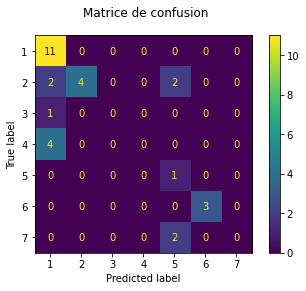

In [65]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


fig = plot_confusion_matrix(clf, X_test, Y_test, display_labels=clf.classes_)
fig.figure_.suptitle("Matrice de confusion")
plt.show()

# Methode du K-NN

In [11]:
# appel de la fonction
from sklearn.neighbors import KNeighborsClassifier
#### 1. Instanciation du modele
knn = KNeighborsClassifier( )
knn   
#### 2. fitting du model
knn.fit(trainX_scaled , Y_train)
#### 3. Prediction
pred = knn.predict(X_test)



/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [12]:
#GridSearch

#parametre du grid
params =[
    {'n_neighbors':[1,2,3,1,2,3,5,4,6,8,7,9,5,4,52,4,58]},
    {'leaf_size':[4,65,4,7,8,9,5,4,6]}
]

knn_best_model = GridSearchCV(knn, params,cv=5, verbose=10)
knn_best_model.fit(X_train,Y_train)

#parametres optimaux
print('best params',knn_best_model.best_params_)
#modele optimal
print('best estimator',knn_best_model.best_estimator_)
#meilleur index
print('best index',knn_best_model.best_index_)
#meilleur score
print('best score',knn_best_model.best_score_)

Fitting 5 folds for each of 26 candidates, totalling 130 fits
[CV 1/5; 1/26] START n_neighbors=1..............................................
[CV 1/5; 1/26] END ...............n_neighbors=1;, score=1.000 total time=   0.0s
[CV 2/5; 1/26] START n_neighbors=1..............................................
[CV 2/5; 1/26] END ...............n_neighbors=1;, score=0.929 total time=   0.0s
[CV 3/5; 1/26] START n_neighbors=1..............................................
[CV 3/5; 1/26] END ...............n_neighbors=1;, score=1.000 total time=   0.0s
[CV 4/5; 1/26] START n_neighbors=1..............................................
[CV 4/5; 1/26] END ...............n_neighbors=1;, score=1.000 total time=   0.0s
[CV 5/5; 1/26] START n_neighbors=1..............................................
[CV 5/5; 1/26] END ...............n_neighbors=1;, score=1.000 total time=   0.0s
[CV 1/5; 2/26] START n_neighbors=2..............................................
[CV 1/5; 2/26] END ...............n_neighbors=2

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 5/5; 4/26] END ...............n_neighbors=1;, score=1.000 total time=   0.0s
[CV 1/5; 5/26] START n_neighbors=2..............................................
[CV 1/5; 5/26] END ...............n_neighbors=2;, score=0.929 total time=   0.0s
[CV 2/5; 5/26] START n_neighbors=2..............................................
[CV 2/5; 5/26] END ...............n_neighbors=2;, score=0.857 total time=   0.0s
[CV 3/5; 5/26] START n_neighbors=2..............................................
[CV 3/5; 5/26] END ...............n_neighbors=2;, score=0.929 total time=   0.0s
[CV 4/5; 5/26] START n_neighbors=2..............................................
[CV 4/5; 5/26] END ...............n_neighbors=2;, score=0.857 total time=   0.0s
[CV 5/5; 5/26] START n_neighbors=2..............................................
[CV 5/5; 5/26] END ...............n_neighbors=2;, score=1.000 total time=   0.0s
[CV 1/5; 6/26] START n_neighbors=3..............................................
[CV 1/5; 6/26] END .........

[CV 5/5; 16/26] END ..............n_neighbors=4;, score=0.929 total time=   0.0s
[CV 1/5; 17/26] START n_neighbors=58............................................
[CV 1/5; 17/26] END ...............n_neighbors=58;, score=nan total time=   0.0s
[CV 2/5; 17/26] START n_neighbors=58............................................
[CV 2/5; 17/26] END ...............n_neighbors=58;, score=nan total time=   0.0s
[CV 3/5; 17/26] START n_neighbors=58............................................
[CV 3/5; 17/26] END ...............n_neighbors=58;, score=nan total time=   0.0s
[CV 4/5; 17/26] START n_neighbors=58............................................
[CV 4/5; 17/26] END ...............n_neighbors=58;, score=nan total time=   0.0s
[CV 5/5; 17/26] START n_neighbors=58............................................
[CV 5/5; 17/26] END ...............n_neighbors=58;, score=nan total time=   0.0s
[CV 1/5; 18/26] START leaf_size=4...............................................
[CV 1/5; 18/26] END ........

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/Users/macbookpro/opt/anacond


[CV 4/5; 23/26] START leaf_size=9...............................................
[CV 4/5; 23/26] END ................leaf_size=9;, score=0.786 total time=   0.0s
[CV 5/5; 23/26] START leaf_size=9...............................................
[CV 5/5; 23/26] END ................leaf_size=9;, score=0.857 total time=   0.0s
[CV 1/5; 24/26] START leaf_size=5...............................................
[CV 1/5; 24/26] END ................leaf_size=5;, score=0.714 total time=   0.0s
[CV 2/5; 24/26] START leaf_size=5...............................................
[CV 2/5; 24/26] END ................leaf_size=5;, score=0.786 total time=   0.0s
[CV 3/5; 24/26] START leaf_size=5...............................................
[CV 3/5; 24/26] END ................leaf_size=5;, score=0.786 total time=   0.0s
[CV 4/5; 24/26] START leaf_size=5...............................................
[CV 4/5; 24/26] END ................leaf_size=5;, score=0.786 total time=   0.0s
[CV 5/5; 24/26] START leaf_

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.98571429 0.91428571 0.9        0.98571429 0.91428571 0.9
 0.78571429 0.88571429 0.77142857 0.74285714 0.74285714 0.74285714
 0.78571429 0.88571429 0.41428571 0.88571429        nan 0.78571429
 0.78571429 0.78571429 0.78571429 0.78571429 0.78571429 0.78571429
 0.78571429 0.78571429]
  warnings.warn(


# Regression Logistic

In [13]:
# instanciation du model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=5,C=2.3,solver='saga',max_iter=9,multi_class='ovr')
# fiting des du model
lr.fit(trainX_scaled,Y_train)
# prediction
pred_lr = lr.predict(X_test)
# mesure evaluation
lr_acc = accuracy_score(Y_test, pred_lr)


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/ana

In [14]:
#GridSearch

#parametre du grid
params=[
    {'penalty':['l1', 'l2', 'elasticnet', 'none']},
    {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
    {'max_iter':[10,34,55,78]}
]
lr_best_model = GridSearchCV(lr,params,cv=5,verbose=10)
lr_best_model.fit(X_train,Y_train)


#parametres optimaux
print('best params',lr_best_model.best_params_)
#modele optimal
print('best estimator',lr_best_model.best_estimator_)
#meilleur index
print('best index',lr_best_model.best_index_)
#meilleur score
print('best score',lr_best_model.best_score_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV 1/5; 1/13] START penalty=l1.................................................
[CV 1/5; 1/13] END ..................penalty=l1;, score=0.857 total time=   0.0s
[CV 2/5; 1/13] START penalty=l1.................................................
[CV 2/5; 1/13] END ..................penalty=l1;, score=0.786 total time=   0.0s
[CV 3/5; 1/13] START penalty=l1.................................................
[CV 3/5; 1/13] END ..................penalty=l1;, score=0.857 total time=   0.0s
[CV 4/5; 1/13] START penalty=l1.................................................
[CV 4/5; 1/13] END ..................penalty=l1;, score=0.857 total time=   0.0s
[CV 5/5; 1/13] START penalty=l1.................................................
[CV 5/5; 1/13] END ..................penalty=l1;, score=0.786 total time=   0.0s
[CV 1/5; 2/13] START penalty=l2.................................................
[CV 1/5; 2/13] END ..................penalty=l2;

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ma

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/ana

[CV 1/5; 4/13] END ................penalty=none;, score=0.857 total time=   0.0s
[CV 2/5; 4/13] START penalty=none...............................................
[CV 2/5; 4/13] END ................penalty=none;, score=0.786 total time=   0.0s
[CV 3/5; 4/13] START penalty=none...............................................
[CV 3/5; 4/13] END ................penalty=none;, score=0.857 total time=   0.0s
[CV 4/5; 4/13] START penalty=none...............................................
[CV 4/5; 4/13] END ................penalty=none;, score=0.857 total time=   0.0s
[CV 5/5; 4/13] START penalty=none...............................................
[CV 5/5; 4/13] END ................penalty=none;, score=0.786 total time=   0.0s
[CV 1/5; 5/13] START solver=newton-cg...........................................
[CV 1/5; 5/13] END ............solver=newton-cg;, score=0.929 total time=   0.1s
[CV 2/5; 5/13] START solver=newton-cg...........................................
[CV 2/5; 5/13] END .........

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib

[CV 3/5; 5/13] END ............solver=newton-cg;, score=1.000 total time=   0.1s
[CV 4/5; 5/13] START solver=newton-cg...........................................
[CV 4/5; 5/13] END ............solver=newton-cg;, score=1.000 total time=   0.1s
[CV 5/5; 5/13] START solver=newton-cg...........................................
[CV 5/5; 5/13] END ............solver=newton-cg;, score=0.857 total time=   0.0s
[CV 1/5; 6/13] START solver=lbfgs...............................................
[CV 1/5; 6/13] END ................solver=lbfgs;, score=0.929 total time=   0.0s
[CV 2/5; 6/13] START solver=lbfgs...............................................
[CV 2/5; 6/13] END ................solver=lbfgs;, score=0.857 total time=   0.0s
[CV 3/5; 6/13] START solver=lbfgs...............................................
[CV 3/5; 6/13] END ................solver=lbfgs;, score=1.000 total time=   0.0s
[CV 4/5; 6/13] START solver=lbfgs...............................................


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

[CV 4/5; 6/13] END ................solver=lbfgs;, score=0.929 total time=   0.0s
[CV 5/5; 6/13] START solver=lbfgs...............................................
[CV 5/5; 6/13] END ................solver=lbfgs;, score=0.857 total time=   0.0s
[CV 1/5; 7/13] START solver=liblinear...........................................
[CV 1/5; 7/13] END ............solver=liblinear;, score=0.929 total time=   0.0s
[CV 2/5; 7/13] START solver=liblinear...........................................
[CV 2/5; 7/13] END ............solver=liblinear;, score=0.929 total time=   0.0s
[CV 3/5; 7/13] START solver=liblinear...........................................
[CV 3/5; 7/13] END ............solver=liblinear;, score=1.000 total time=   0.0s
[CV 4/5; 7/13] START solver=liblinear...........................................
[CV 4/5; 7/13] END ............solver=liblinear;, score=1.000 total time=   0.0s
[CV 5/5; 7/13] START solver=liblinear...........................................
[CV 5/5; 7/13] END .........

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/ana

[CV 2/5; 10/13] END ................max_iter=10;, score=0.786 total time=   0.0s
[CV 3/5; 10/13] START max_iter=10...............................................
[CV 3/5; 10/13] END ................max_iter=10;, score=0.857 total time=   0.0s
[CV 4/5; 10/13] START max_iter=10...............................................
[CV 4/5; 10/13] END ................max_iter=10;, score=0.857 total time=   0.0s
[CV 5/5; 10/13] START max_iter=10...............................................
[CV 5/5; 10/13] END ................max_iter=10;, score=0.786 total time=   0.0s
[CV 1/5; 11/13] START max_iter=34...............................................
[CV 1/5; 11/13] END ................max_iter=34;, score=0.929 total time=   0.0s
[CV 2/5; 11/13] START max_iter=34...............................................
[CV 2/5; 11/13] END ................max_iter=34;, score=0.786 total time=   0.0s
[CV 3/5; 11/13] START max_iter=34...............................................
[CV 3/5; 11/13] END ........

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/ana

[CV 5/5; 12/13] END ................max_iter=55;, score=0.857 total time=   0.0s
[CV 1/5; 13/13] START max_iter=78...............................................
[CV 1/5; 13/13] END ................max_iter=78;, score=0.929 total time=   0.0s
[CV 2/5; 13/13] START max_iter=78...............................................
[CV 2/5; 13/13] END ................max_iter=78;, score=0.929 total time=   0.0s
[CV 3/5; 13/13] START max_iter=78...............................................
[CV 3/5; 13/13] END ................max_iter=78;, score=1.000 total time=   0.0s
[CV 4/5; 13/13] START max_iter=78...............................................
[CV 4/5; 13/13] END ................max_iter=78;, score=1.000 total time=   0.0s
[CV 5/5; 13/13] START max_iter=78...............................................
[CV 5/5; 13/13] END ................max_iter=78;, score=0.857 total time=   0.0s
best params {'solver': 'newton-cg'}
best estimator LogisticRegression(C=2.3, max_iter=9, multi_class='ovr', r

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macbookpro/opt/ana

# Naive Bayesian

In [19]:
# instanciation du model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# fiting du model
gnb.fit(trainX_scaled, Y_train)
# prediction du model
pred_gnb = gnb.predict(X_test)
# mesure evaluation
gnb_acc = accuracy_score(Y_test,pred_gnb)


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [22]:
#GridSearch

#parametre du grid
params=[
    {'priors':[None]},
    {'var_smoothing':[1.5,2,3.7]}
]
gnb_best_model = GridSearchCV(gnb,params,cv=5,verbose=10)
gnb_best_model.fit(X_train,Y_train)


#parametres optimaux
print('best params',gnb_best_model.best_params_)
#modele optimal
print('best estimator',gnb_best_model.best_estimator_)
#meilleur index
print('best index',gnb_best_model.best_index_)
#meilleur score
print('best score',gnb_best_model.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START priors=None.................................................
[CV 1/5; 1/4] END ..................priors=None;, score=0.929 total time=   0.0s
[CV 2/5; 1/4] START priors=None.................................................
[CV 2/5; 1/4] END ..................priors=None;, score=0.929 total time=   0.0s
[CV 3/5; 1/4] START priors=None.................................................
[CV 3/5; 1/4] END ..................priors=None;, score=1.000 total time=   0.0s
[CV 4/5; 1/4] START priors=None.................................................
[CV 4/5; 1/4] END ..................priors=None;, score=1.000 total time=   0.0s
[CV 5/5; 1/4] START priors=None.................................................
[CV 5/5; 1/4] END ..................priors=None;, score=0.857 total time=   0.0s
[CV 1/5; 2/4] START var_smoothing=1.5...........................................
[CV 1/5; 2/4] END ............var_smoothing=1.5;,

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


# Arbre de decision

In [16]:
# instanciation du model
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier( criterion='entropy',splitter='random',max_features='sqrt', min_samples_split=7)
# fiting du model
dtc.fit(trainX_scaled, Y_train)
# prediction du model
pred_dtc = dtc.predict(X_test)
# mesure evaluation
dtc_acc = accuracy_score(Y_test,pred_dtc)


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [17]:
#GridSearch

#parametre du grid

# Paramètres du grid
params=[
    {'criterion':["gini", "entropy"]},
    {'max_depth':[10,15,2,33,5,None]},
    {'min_samples_leaf':[1,5,4,3,2]},
    {'max_leaf_nodes':[None,3,50,100,23,10,56]}
]

dtc_best_model = GridSearchCV(dtc,params,cv=5,verbose=10)
dtc_best_model.fit(X_train,Y_train)


best_model = GridSearchCV(dtc, params,cv=5, verbose=10)
best_model.fit(X_train,Y_train)

#parametres optimaux
print('best params',dtc_best_model.best_params_)
#modele optimal
print('best estimator',dtc_best_model.best_estimator_)
#meilleur index
print('best index',dtc_best_model.best_index_)
#meilleur score
print('best score',dtc_best_model.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START criterion=gini.............................................
[CV 1/5; 1/20] END ..............criterion=gini;, score=0.929 total time=   0.0s
[CV 2/5; 1/20] START criterion=gini.............................................
[CV 2/5; 1/20] END ..............criterion=gini;, score=0.857 total time=   0.0s
[CV 3/5; 1/20] START criterion=gini.............................................
[CV 3/5; 1/20] END ..............criterion=gini;, score=0.857 total time=   0.0s
[CV 4/5; 1/20] START criterion=gini.............................................
[CV 4/5; 1/20] END ..............criterion=gini;, score=1.000 total time=   0.0s
[CV 5/5; 1/20] START criterion=gini.............................................
[CV 5/5; 1/20] END ..............criterion=gini;, score=0.786 total time=   0.0s
[CV 1/5; 2/20] START criterion=entropy..........................................
[CV 1/5; 2/20] END ...........criterion=entropy

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


[CV 2/5; 6/20] END ................max_depth=33;, score=0.929 total time=   0.0s
[CV 3/5; 6/20] START max_depth=33...............................................
[CV 3/5; 6/20] END ................max_depth=33;, score=0.857 total time=   0.0s
[CV 4/5; 6/20] START max_depth=33...............................................
[CV 4/5; 6/20] END ................max_depth=33;, score=0.929 total time=   0.0s
[CV 5/5; 6/20] START max_depth=33...............................................
[CV 5/5; 6/20] END ................max_depth=33;, score=0.929 total time=   0.0s
[CV 1/5; 7/20] START max_depth=5................................................
[CV 1/5; 7/20] END .................max_depth=5;, score=0.786 total time=   0.0s
[CV 2/5; 7/20] START max_depth=5................................................
[CV 2/5; 7/20] END .................max_depth=5;, score=0.857 total time=   0.0s
[CV 3/5; 7/20] START max_depth=5................................................
[CV 3/5; 7/20] END .........

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



[CV 2/5; 2/20] START criterion=entropy..........................................
[CV 2/5; 2/20] END ...........criterion=entropy;, score=0.857 total time=   0.0s
[CV 3/5; 2/20] START criterion=entropy..........................................
[CV 3/5; 2/20] END ...........criterion=entropy;, score=0.857 total time=   0.0s
[CV 4/5; 2/20] START criterion=entropy..........................................
[CV 4/5; 2/20] END ...........criterion=entropy;, score=0.857 total time=   0.0s
[CV 5/5; 2/20] START criterion=entropy..........................................
[CV 5/5; 2/20] END ...........criterion=entropy;, score=0.929 total time=   0.0s
[CV 1/5; 3/20] START max_depth=10...............................................
[CV 1/5; 3/20] END ................max_depth=10;, score=0.571 total time=   0.0s
[CV 2/5; 3/20] START max_depth=10...............................................
[CV 2/5; 3/20] END ................max_depth=10;, score=0.857 total time=   0.0s
[CV 3/5; 3/20] START max_de

[CV 5/5; 17/20] START max_leaf_nodes=100........................................
[CV 5/5; 17/20] END .........max_leaf_nodes=100;, score=0.857 total time=   0.0s
[CV 1/5; 18/20] START max_leaf_nodes=23.........................................
[CV 1/5; 18/20] END ..........max_leaf_nodes=23;, score=0.857 total time=   0.0s
[CV 2/5; 18/20] START max_leaf_nodes=23.........................................
[CV 2/5; 18/20] END ..........max_leaf_nodes=23;, score=0.857 total time=   0.0s
[CV 3/5; 18/20] START max_leaf_nodes=23.........................................
[CV 3/5; 18/20] END ..........max_leaf_nodes=23;, score=1.000 total time=   0.0s
[CV 4/5; 18/20] START max_leaf_nodes=23.........................................
[CV 4/5; 18/20] END ..........max_leaf_nodes=23;, score=1.000 total time=   0.0s
[CV 5/5; 18/20] START max_leaf_nodes=23.........................................
[CV 5/5; 18/20] END ..........max_leaf_nodes=23;, score=0.929 total time=   0.0s
[CV 1/5; 19/20] START max_le

# **Best Model**

In [27]:
best_model = [
    {"Score du model_knn":knn_best_model.best_score_},
    {"Score du model_lr":lr_best_model.best_score_},
    {"Score du model_dtc":dtc_best_model.best_score_},
    {"Score du model_gnb":gnb_best_model.best_score_},
    {"Score du model_nn":nn_best_model.best_score_},

]
best_model


[{'Score du model_knn': 0.9857142857142858},
 {'Score du model_lr': 0.9428571428571428},
 {'Score du model_dtc': 0.9},
 {'Score du model_gnb': 0.9428571428571428},
 {'Score du model_nn': 0.9428571428571428}]